# Data Ingestion



In [1]:
import pandas as pd

# Load the datasets
df_employee = pd.read_csv('Employee_dataset.csv')
df_salary = pd.read_csv('Employee_salaries.csv')

# Data Cleaning

## Employee Dataset

Looking for inconsistencies and inspecting data

In [2]:
df_employee.shape

(1000000, 8)

In [3]:
df_employee.head()

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   jobId            999895 non-null  object 
 1   companyId        999852 non-null  object 
 2   jobRole          999835 non-null  object 
 3   education        999814 non-null  object 
 4   major            999793 non-null  object 
 5   industry         999786 non-null  object 
 6   yearsExperience  999802 non-null  float64
 7   distanceFromCBD  999834 non-null  float64
dtypes: float64(2), object(6)
memory usage: 61.0+ MB


In [5]:
df_employee.describe(include='all')

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
count,999895,999852,999835,999814,999793,999786,999802.000000,9.998340e+05
unique,999895,63,10,5,9,8,NaN,NaN
top,JOB1362685407686,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN
freq,1,16192,125871,236936,532239,143183,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992423,5.687670e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212395,6.796951e+03
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.500000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,5.000000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,7.500000e+01


In [6]:
# Create a summary dataframe for missing values
missing_count = df_employee.isnull().sum()
missing_percentage = (df_employee.isnull().sum() / len(df_employee)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Percentage (%)': missing_percentage
})

# Display the summary for all 8 columns
display(missing_data_summary)

,Missing Count,Percentage (%)
jobId,105,0.0105
companyId,148,0.0148
jobRole,165,0.0165
education,186,0.0186
major,207,0.0207
industry,214,0.0214
yearsExperience,198,0.0198
distanceFromCBD,166,0.0166


Initial inspection discovery

- There are many instances of missing or incomplete entries.

- Certain entries feature data that have inconsistent values, e.g. JOB1362685407686 in the jobId column which should not include letters. this can also be found in the company id column as well.

- Due to the first point, columns are also hence set with an incorrect data type. ID columns should be standardised and set as int instead of string data type.

- the distance from CBD column features visible outliers. This can be observed when inspecting the MAX, where the value is incredibly high.


## Data Cleaning

standardise column heads

In [7]:
import re

def to_snake_case(name):
    # Replace camelCase/PascalCase with snake_case
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Apply standardization to df_employee
df_employee.columns = [to_snake_case(col) for col in df_employee.columns]

# Apply standardization to df_salary
df_salary.columns = [to_snake_case(col) for col in df_salary.columns]

print("Standardized columns for df_employee:", df_employee.columns.tolist())
print("Standardized columns for df_salary:", df_salary.columns.tolist())

Standardized columns for df_employee: ['job_id', 'company_id', 'job_role', 'education', 'major', 'industry', 'years_experience', 'distance_from_cbd']
Standardized columns for df_salary: ['job_id', 'salary_in_thousands']


In [8]:
df_employee.head()

,job_id,company_id,job_role,education,major,industry,years_experience,distance_from_cbd
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fix job_id entries (standardise as only numerical)

In [9]:
# Remove 'JOB' prefix and convert job_id to nullable integer
df_employee['job_id'] = (
    df_employee['job_id']
    .astype(str)
    .str.replace('JOB', '', regex=False)
    .replace(['nan', 'None', 'NaN'], pd.NA)
    .astype('Int64')
)

# Print the column to verify
df_employee['job_id'].head()

,job_id
0,1362684407687
1,1362684407688
2,<NA>
3,<NA>
4,<NA>


Fix company_id entries (standardise as only numerical)

In [10]:
# Remove 'COMP' prefix and convert company_id to nullable integer
df_employee['company_id'] = (
    df_employee['company_id']
    .astype(str)
    .str.replace('COMP', '', regex=False)
    .replace(['nan', 'None', 'NaN', 'pd.NA', '<NA>'], pd.NA)
    .astype('Int64')
)

# Print the first few rows to verify the changes
df_employee.head()

,job_id,company_id,job_role,education,major,industry,years_experience,distance_from_cbd
0,1362684407687,37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,1362684407688,19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
3,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
4,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN


## Further inspection of individual columns

In [11]:
# Identify columns that contain string data (object, category, or string types)
string_cols = df_employee.select_dtypes(include=['object', 'category', 'string']).columns

# Filter out numeric/boolean columns that might be categorized as objects
# and iterate through valid string-like columns
for col in string_cols:
    # Only process if the column is actually in the dataframe and not job_id/company_id (already handled)
    if col not in ['job_id', 'company_id']:
        temp_series = df_employee[col].astype(str)

        print(f"\n--- {col} ---")
        print(f"Unique values count: {temp_series.nunique(dropna=False)}")
        print("Value Counts:")
        print(temp_series.value_counts(dropna=False).head(15))  # Showing top 15 for readability


--- job_role ---
Unique values count: 11
Value Counts:
job_role
SENIOR            125871
VICE_PRESIDENT    125217
MANAGER           125092
CTO               125021
JANITOR           124951
CEO               124759
JUNIOR            124568
CFO               124351
nan                  165
SCAMMER                4
PRESIDENT              1
Name: count, dtype: int64

--- education ---
Unique values count: 6
Value Counts:
education
HIGH_SCHOOL    236936
NONE           236807
BACHELORS      175459
DOCTORAL       175332
MASTERS        175280
nan               186
Name: count, dtype: int64

--- major ---
Unique values count: 10
Value Counts:
major
NONE           532239
CHEMISTRY       58857
LITERATURE      58668
ENGINEERING     58589
BUSINESS        58509
PHYSICS         58401
BIOLOGY         58368
COMPSCI         58367
MATH            57795
nan               207
Name: count, dtype: int64

--- industry ---
Unique values count: 9
Value Counts:
industry
WEB           143183
AUTO          142911

Findings:

All columns seem to have a reasonable distribution of entries and relatively manageable amount of null values, except from a few outliers.

job_role: 2 outliers, scammer, with 4 entries, and president with 1.

education and major: features an incredible high amount of entries of people with 'NONE' as education. Will have to do further inspection to see if they are actually uneducated or to treat 'NONE' as null values.



Moving forward, the most logical choice is to impute the na values of both education and major into NONE. The amount of entries in the NONE is too high to drop, hence we will treat them as having no education.

In [12]:
# Impute NaN values for education and major with 'NONE'
df_employee[['education', 'major']] = df_employee[['education', 'major']].fillna('NONE')

# Target columns for inspection
target_cols = ['job_role', 'education', 'major', 'industry']

# Print unique counts and top value counts for specified columns
for col in target_cols:
    if col in df_employee.columns:
        temp_series = df_employee[col].astype(str)

        print(f"\n--- {col} ---")
        print(f"Unique values count: {temp_series.nunique(dropna=False)}")
        print("Value Counts:")
        print(df_employee[col].value_counts(dropna=False).head(15))


--- job_role ---
Unique values count: 11
Value Counts:
job_role
SENIOR            125871
VICE_PRESIDENT    125217
MANAGER           125092
CTO               125021
JANITOR           124951
CEO               124759
JUNIOR            124568
CFO               124351
NaN                  165
SCAMMER                4
PRESIDENT              1
Name: count, dtype: int64

--- education ---
Unique values count: 5
Value Counts:
education
NONE           236993
HIGH_SCHOOL    236936
BACHELORS      175459
DOCTORAL       175332
MASTERS        175280
Name: count, dtype: int64

--- major ---
Unique values count: 9
Value Counts:
major
NONE           532446
CHEMISTRY       58857
LITERATURE      58668
ENGINEERING     58589
BUSINESS        58509
PHYSICS         58401
BIOLOGY         58368
COMPSCI         58367
MATH            57795
Name: count, dtype: int64

--- industry ---
Unique values count: 9
Value Counts:
industry
WEB           143183
AUTO          142911
FINANCE       142837
EDUCATION     142783
OI

Since there is not much we can do for industry or job role in regards to null values, we can drop them

In [13]:
# Drop null values in job_role and industry
df_employee.dropna(subset=['job_role', 'industry'], inplace=True)

# Print unique values counts for these two columns
for col in ['job_role', 'industry']:
    temp_series = df_employee[col].astype(str)
    print(f"\n--- {col} ---")
    print(f"Unique values count: {temp_series.nunique()}")
    print("Value Counts:")
    print(df_employee[col].value_counts())


--- job_role ---
Unique values count: 10
Value Counts:
job_role
SENIOR            125862
VICE_PRESIDENT    125202
MANAGER           125084
CTO               125010
JANITOR           124934
CEO               124744
JUNIOR            124553
CFO               124332
SCAMMER                4
PRESIDENT              1
Name: count, dtype: int64

--- industry ---
Unique values count: 8
Value Counts:
industry
WEB           143179
AUTO          142902
FINANCE       142833
EDUCATION     142772
OIL           142731
HEALTH        142707
SERVICE       142601
GOVERNMENT         1
Name: count, dtype: int64


Inspecting suspicious 'scammer' entries...

In [14]:
# Inspect rows where job_role is 'SCAMMER'
scammer_rows = df_employee[df_employee['job_role'] == 'SCAMMER']
display(scammer_rows)

,job_id,company_id,job_role,education,major,industry,years_experience,distance_from_cbd
10,1362684407697,56,SCAMMER,HIGH_SCHOOL,NONE,SERVICE,24.0,30.0
242,1362684407929,40,SCAMMER,NONE,NONE,SERVICE,14.0,6777777.0
354,1362684408041,7,SCAMMER,NONE,NONE,SERVICE,0.0,44444.0
421000,1362684828687,16,SCAMMER,HIGH_SCHOOL,NONE,SERVICE,12.0,23232.0


As we can see, these outliers are obviously forged as distance from CBD include all outlier data. like 6777777.00. Since its only 4 rows, we can safely drop them.

In [15]:
# Drop rows where job_role is 'SCAMMER'
df_employee = df_employee[df_employee['job_role'] != 'SCAMMER']

# Verify the change
print("Remaining unique job roles:")
print(df_employee['job_role'].unique())
print(f"\nNew dataset shape: {df_employee.shape}")

Remaining unique job roles:
['CFO' 'CEO' 'JUNIOR' 'JANITOR' 'CTO' 'VICE_PRESIDENT' 'SENIOR' 'MANAGER'
 'PRESIDENT']

New dataset shape: (999722, 8)


In [16]:
# Display the data types of all columns in df_employee
print(df_employee.dtypes)

job_id                 Int64
company_id             Int64
job_role              object
education             object
major                 object
industry              object
years_experience     float64
distance_from_cbd    float64
dtype: object


In [17]:
# Count entries with null in either job_id or company_id
null_id_count = df_employee[df_employee['job_id'].isna() | df_employee['company_id'].isna()].shape[0]
print(f"Number of entries with missing job_id or company_id: {null_id_count}")

Number of entries with missing job_id or company_id: 18


In [18]:
# Drop rows where either job_id or company_id is null
df_employee.dropna(subset=['job_id', 'company_id'], inplace=True)

# Verify the final count and that no null IDs remain
remaining_nulls = df_employee[df_employee['job_id'].isna() | df_employee['company_id'].isna()].shape[0]
print(f"Remaining entries with missing IDs: {remaining_nulls}")
print(f"Final dataset shape: {df_employee.shape}")

Remaining entries with missing IDs: 0
Final dataset shape: (999704, 8)


Since on both ID columns, there is a relatively small amount of null values, its safe to drop as well

In [19]:
# Final check for missing values across all columns
final_missing_check = df_employee.isnull().sum()
final_missing_percentage = (df_employee.isnull().sum() / len(df_employee)) * 100

final_summary = pd.DataFrame({
    'Missing Count': final_missing_check,
    'Percentage (%)': final_missing_percentage
})

print("Current Missing Data Summary:")
display(final_summary)

Current Missing Data Summary:


,Missing Count,Percentage (%)
job_id,0,0.0000
company_id,0,0.0000
job_role,0,0.0000
education,0,0.0000
major,0,0.0000
industry,0,0.0000
years_experience,3,0.0003
distance_from_cbd,1,0.0001


Since all columns no longer have null values, we can move on to fixing the datatypes of each column

In [20]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999704 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   job_id             999704 non-null  Int64  
 1   company_id         999704 non-null  Int64  
 2   job_role           999704 non-null  object 
 3   education          999704 non-null  object 
 4   major              999704 non-null  object 
 5   industry           999704 non-null  object 
 6   years_experience   999701 non-null  float64
 7   distance_from_cbd  999703 non-null  float64
dtypes: Int64(2), float64(2), object(4)
memory usage: 70.6+ MB


In [21]:
# Convert company_id to category
if 'company_id' in df_employee.columns:
    df_employee['company_id'] = df_employee['company_id'].astype('category')

# Convert string columns to category for efficient EDA
for col in df_employee.select_dtypes(include='string').columns:
    df_employee[col] = df_employee[col].astype('category')

# Convert nullable Int64 columns to regular int64
int_cols_nullable = df_employee.select_dtypes(include='Int64').columns
df_employee[int_cols_nullable] = df_employee[int_cols_nullable].astype('int64')

In [22]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999704 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   job_id             999704 non-null  int64   
 1   company_id         999704 non-null  category
 2   job_role           999704 non-null  object  
 3   education          999704 non-null  object  
 4   major              999704 non-null  object  
 5   industry           999704 non-null  object  
 6   years_experience   999701 non-null  float64 
 7   distance_from_cbd  999703 non-null  float64 
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 62.0+ MB


I've changed the datatype of company_id so as to reduce memory usage and hopefully speed up EDA.

# Salary Dataset


## Initial inspection

In [23]:
df_salary.shape

(1000000, 2)

In [24]:
df_salary.head(5)

,job_id,salary_in_thousands
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407689,137.0
3,JOB1362684407690,142.0
4,JOB1362684407691,163.0


In [25]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   job_id               999777 non-null  object 
 1   salary_in_thousands  999771 non-null  float64
dtypes: float64(1), object(1)
memory usage: 15.3+ MB


In [26]:
display(df_salary.describe(include='all'))

,job_id,salary_in_thousands
count,999777,9.997710e+05
unique,999777,NaN
top,JOB1362685407686,NaN
freq,1,NaN
mean,NaN,1.260638e+02
std,NaN,1.000110e+04
min,NaN,0.000000e+00
25%,NaN,8.800000e+01
50%,NaN,1.140000e+02
75%,NaN,1.410000e+02


In [27]:
# Set display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Display descriptive statistics for df_salary
display(df_salary.describe(include='all'))

,job_id,salary_in_thousands
count,999777,999771.00
unique,999777,NaN
top,JOB1362685407686,NaN
freq,1,NaN
mean,NaN,126.06
std,NaN,10001.10
min,NaN,0.00
25%,NaN,88.00
50%,NaN,114.00
75%,NaN,141.00


In [28]:
missing_counts = df_salary.isnull().sum()
missing_perc = (missing_counts / len(df_salary) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_perc})
display(missing_df[missing_df['Missing Count'] > 0])


,Missing Count,Missing %
job_id,223,0.02
salary_in_thousands,229,0.02


Summary of issues found:

- job id has inconsistent entry formats

- because of the point above, the data types are hence incorrect

- salary has outliers as seen in MAX value

- missing data

## Cleaning Salary Dataset

In [29]:
# Remove 'JOB' prefix from job_id in df_salary and convert to nullable integer
df_salary['job_id'] = (
    df_salary['job_id']
    .astype(str)
    .str.replace('JOB', '', regex=False)
    .replace(['nan', 'None', 'NaN'], pd.NA)
    .astype('Int64')
)

# Verify the change
df_salary.head()

,job_id,salary_in_thousands
0,1362684407687,130.00
1,1362684407688,101.00
2,1362684407689,137.00
3,1362684407690,142.00
4,1362684407691,163.00


In [30]:
# Drop rows with missing values in df_salary
df_salary.dropna(inplace=True)

# Verify the final shape and check for nulls
print(f"Final salary dataset shape: {df_salary.shape}")
print("Remaining null values:")
print(df_salary.isnull().sum())

Final salary dataset shape: (999771, 2)
Remaining null values:
job_id                 0
salary_in_thousands    0
dtype: int64


In [31]:
missing_counts = df_salary.isnull().sum()
missing_perc = (missing_counts / len(df_salary) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_perc})
display(missing_df[missing_df['Missing Count'] > 0])


,Missing Count,Missing %


Reasonable to drop missing values as total amount of missing values amount to small amount. (0.02%)

In [32]:
# Convert both columns in df_salary to int64
df_salary['job_id'] = df_salary['job_id'].astype('int64')
df_salary['salary_in_thousands'] = df_salary['salary_in_thousands'].astype('int64')

# Verify the datatypes
print(df_salary.dtypes)
display(df_salary.head())

job_id                 int64
salary_in_thousands    int64
dtype: object


,job_id,salary_in_thousands
0,1362684407687,130
1,1362684407688,101
2,1362684407689,137
3,1362684407690,142
4,1362684407691,163


In [33]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999771 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   job_id               999771 non-null  int64
 1   salary_in_thousands  999771 non-null  int64
dtypes: int64(2)
memory usage: 22.9 MB


# Combining Both Datasets

In [34]:
# Show row counts before merge
print(f"Rows in df_employee: {len(df_employee)}")
print(f"Rows in df_salary: {len(df_salary)}")

# Merge datasets on job_id using an inner join
df_combined = pd.merge(df_employee, df_salary, on='job_id', how='inner')

# Display the shape and first few rows to verify the merge
print(f"\nCombined dataset shape: {df_combined.shape}")
print(f"Total rows in merged dataset: {len(df_combined)}")
display(df_combined.head())

Rows in df_employee: 999704
Rows in df_salary: 999771

Combined dataset shape: (999479, 9)
Total rows in merged dataset: 999479


,job_id,company_id,job_role,education,major,industry,years_experience,distance_from_cbd,salary_in_thousands
0,1362684407687,37,CFO,MASTERS,MATH,HEALTH,10.00,83.00,130
1,1362684407688,19,CEO,HIGH_SCHOOL,NONE,WEB,3.00,73.00,101
2,1362684407698,7,CEO,MASTERS,PHYSICS,EDUCATION,7.00,79.00,144
3,1362684407699,4,JUNIOR,NONE,NONE,OIL,8.00,29.00,79
4,1362684407700,54,JUNIOR,MASTERS,MATH,FINANCE,21.00,26.00,193


We merge the data on the column job_id to ensure that all retained data is complete and as job_id is the only feasable unique identifier present in both datasets.

## Inspection and Cleaning of Merged Data

In [35]:
df_combined.describe(include="all")

,job_id,company_id,job_role,education,major,industry,years_experience,distance_from_cbd,salary_in_thousands
count,999479.00,999479.00,999479,999479,999479,999479,999476.00,999478.00,999479.00
unique,NaN,63.00,9,5,9,8,NaN,NaN,NaN
top,NaN,39.00,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,NaN,16183.00,125829,236864,532066,143141,NaN,NaN,NaN
mean,1362684907556.37,NaN,NaN,NaN,NaN,NaN,11.99,50.03,126.07
std,288629.13,NaN,NaN,NaN,NaN,NaN,7.21,500.91,10002.56
min,1362684407687.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00
25%,1362684657583.50,NaN,NaN,NaN,NaN,NaN,6.00,25.00,88.00
50%,1362684907588.00,NaN,NaN,NaN,NaN,NaN,12.00,50.00,114.00
75%,1362685157466.50,NaN,NaN,NaN,NaN,NaN,18.00,75.00,141.00


In [36]:
# Show total missing values and percentage for each column in the combined dataset
missing_count = df_combined.isnull().sum()
missing_percentage = (missing_count / len(df_combined)) * 100

missing_summary_combined = pd.DataFrame({
    'Missing Count': missing_count,
    'Percentage (%)': missing_percentage
})

print("Missing Data Summary for df_combined:")
display(missing_summary_combined)

Missing Data Summary for df_combined:


,Missing Count,Percentage (%)
job_id,0,0.00
company_id,0,0.00
job_role,0,0.00
education,0,0.00
major,0,0.00
industry,0,0.00
years_experience,3,0.00
distance_from_cbd,1,0.00
salary_in_thousands,0,0.00


In [37]:
# Identify all identical duplicate rows in the merged dataset
duplicates = df_combined[df_combined.duplicated(keep=False)]

print(f"Total identical duplicate rows found: {len(duplicates)}")
if not duplicates.empty:
    display(duplicates.sort_values(by='job_id'))

Total identical duplicate rows found: 0


## Outliers

In [38]:
# Display all column names in the combined dataset
print(df_combined.columns.tolist())

['job_id', 'company_id', 'job_role', 'education', 'major', 'industry', 'years_experience', 'distance_from_cbd', 'salary_in_thousands']


/tmp/ipython-input-4124544303.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='job_role', data=role_counts, palette='viridis')


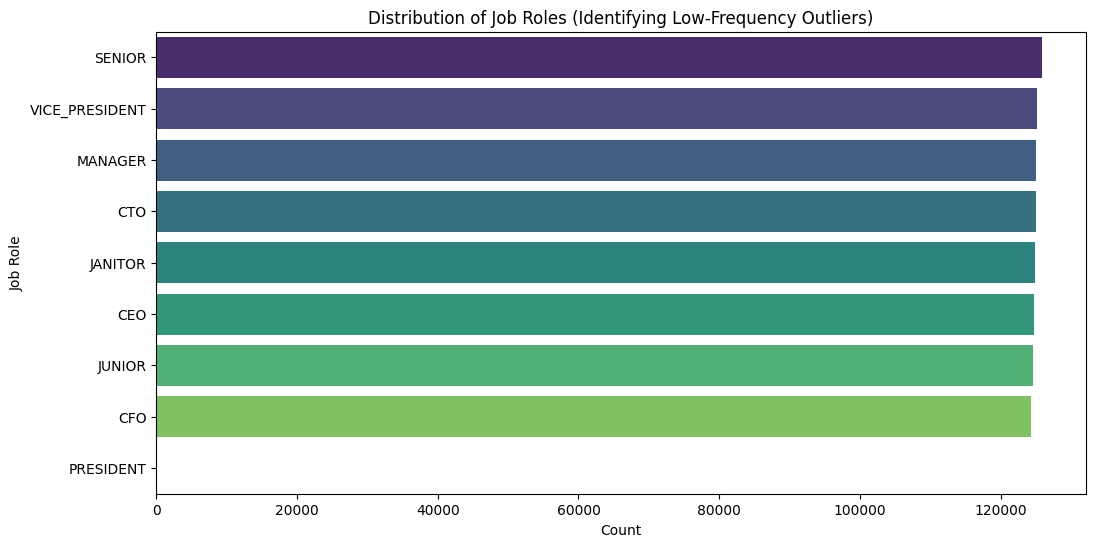

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency counts
role_counts = df_combined['job_role'].value_counts().reset_index()
role_counts.columns = ['job_role', 'count']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='job_role', data=role_counts, palette='viridis')
plt.title('Distribution of Job Roles (Identifying Low-Frequency Outliers)')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

Very clearly as seen in the plot, the role president is considered an outlier with only 1 entry. We will drop it in order to remove any unecessary complexity during model development.

In [40]:
# Remove rows where job_role is 'PRESIDENT'
df_combined = df_combined[df_combined['job_role'] != 'PRESIDENT']

# Verify the change
print("Remaining unique job roles in combined dataset:")
print(df_combined['job_role'].unique())
print(f"\nUpdated combined dataset shape: {df_combined.shape}")

Remaining unique job roles in combined dataset:
['CFO' 'CEO' 'JUNIOR' 'JANITOR' 'CTO' 'VICE_PRESIDENT' 'SENIOR' 'MANAGER']

Updated combined dataset shape: (999478, 9)


/tmp/ipython-input-134128631.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='education', data=edu_counts, palette='magma')


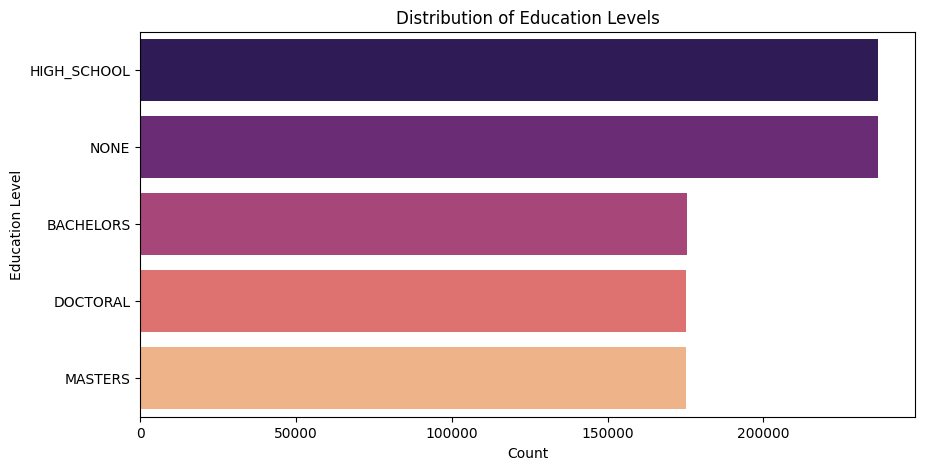

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency counts for education
edu_counts = df_combined['education'].value_counts().reset_index()
edu_counts.columns = ['education', 'count']

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='education', data=edu_counts, palette='magma')
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

/tmp/ipython-input-3652501146.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='major', data=major_counts, palette='plasma')


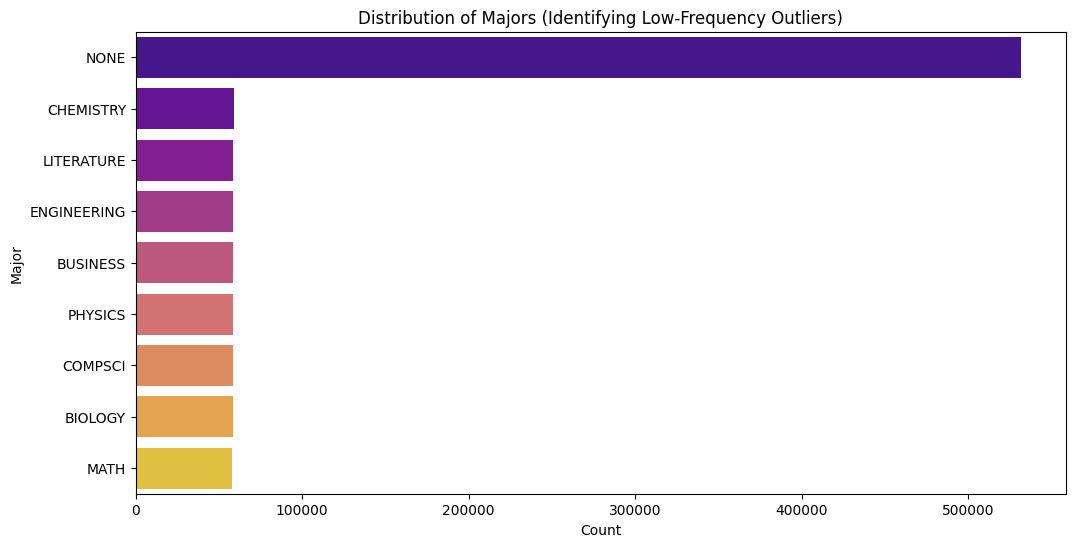

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency counts for major
major_counts = df_combined['major'].value_counts().reset_index()
major_counts.columns = ['major', 'count']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='major', data=major_counts, palette='plasma')
plt.title('Distribution of Majors (Identifying Low-Frequency Outliers)')
plt.xlabel('Count')
plt.ylabel('Major')
plt.show()

as mentioned before, NONE, under both education and major columns will be treated as no education/major.

/tmp/ipython-input-2260943127.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='industry', data=industry_counts, palette='coolwarm')


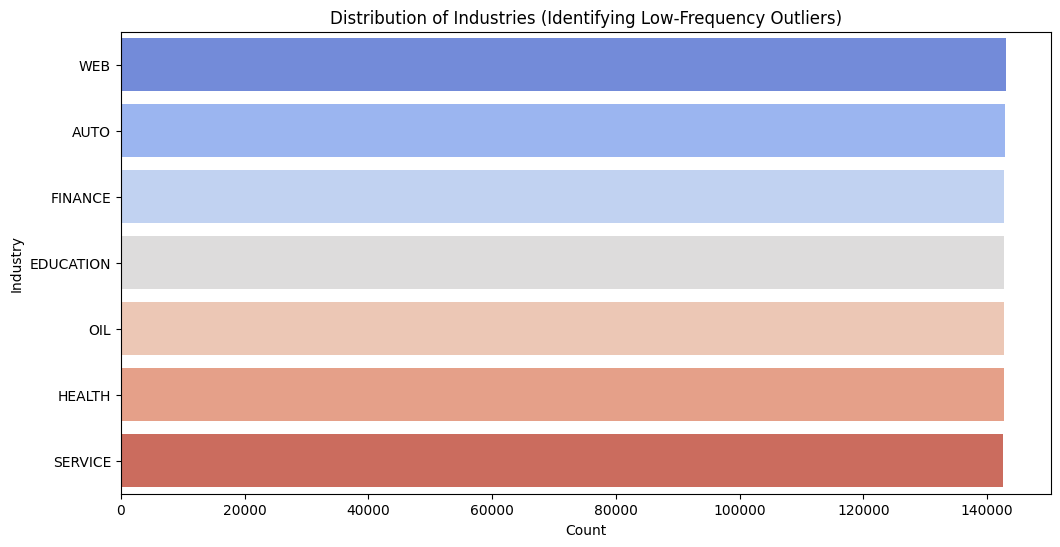

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate frequency counts for industry
industry_counts = df_combined['industry'].value_counts().reset_index()
industry_counts.columns = ['industry', 'count']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='industry', data=industry_counts, palette='coolwarm')
plt.title('Distribution of Industries (Identifying Low-Frequency Outliers)')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

No outliers in industry observed

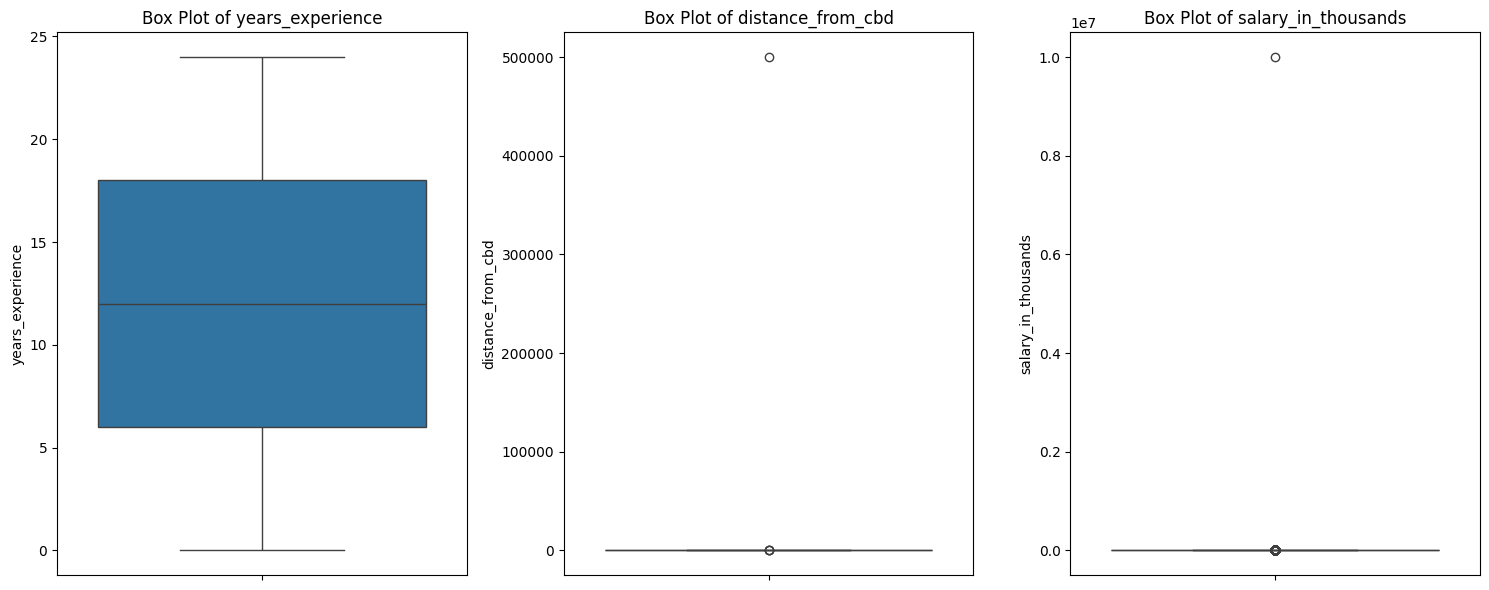

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to check for outliers
numeric_cols = ['years_experience', 'distance_from_cbd', 'salary_in_thousands']

# Create a figure with subplots
plt.figure(figsize=(15, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_combined[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [45]:
display(df_combined[['years_experience', 'distance_from_cbd', 'salary_in_thousands']].describe())

,years_experience,distance_from_cbd,salary_in_thousands
count,999475.00,999477.00,999478.00
mean,11.99,50.03,126.07
std,7.21,500.91,10002.57
min,0.00,0.00,0.00
25%,6.00,25.00,88.00
50%,12.00,50.00,114.00
75%,18.00,75.00,141.00
max,24.00,500000.00,10000000.00


Aside from years_experience looking healthy, clear and expreme outliers can be observed in both distance_from_cbd and salary_in_thousands.
Both columns feature at least 1 entry of extreme value, at 500000 and 10000000 respectively. It is also noted that observing the .describe for each column, entries under salary_in_thousands have values that are 0, which can be considered unrealistic as everyone under this dataset has a job.  


Following the equation to determine outliers based on IQR, where data points falling below

Q1 -1.5 * IQR or above Q3 + 1.5 * IQR

are considered outliers, we can safely drop all entries with extreme values and replot again.

In [46]:
# Define function to filter outliers using IQR
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filter outliers for distance_from_cbd and salary_in_thousands
print(f"Rows before filtering: {len(df_combined)}")
df_combined = filter_outliers(df_combined, 'distance_from_cbd')
df_combined = filter_outliers(df_combined, 'salary_in_thousands')

print(f"Rows after filtering: {len(df_combined)}")
print("\nSummary of cleaned numeric columns:")
display(df_combined[['distance_from_cbd', 'salary_in_thousands']].describe())

Rows before filtering: 999478
Rows after filtering: 992354

Summary of cleaned numeric columns:


,distance_from_cbd,salary_in_thousands
count,992354.00,992354.00
mean,49.73,115.21
std,28.84,37.51
min,0.00,17.00
25%,25.00,88.00
50%,50.00,113.00
75%,75.00,140.00
max,99.00,220.00


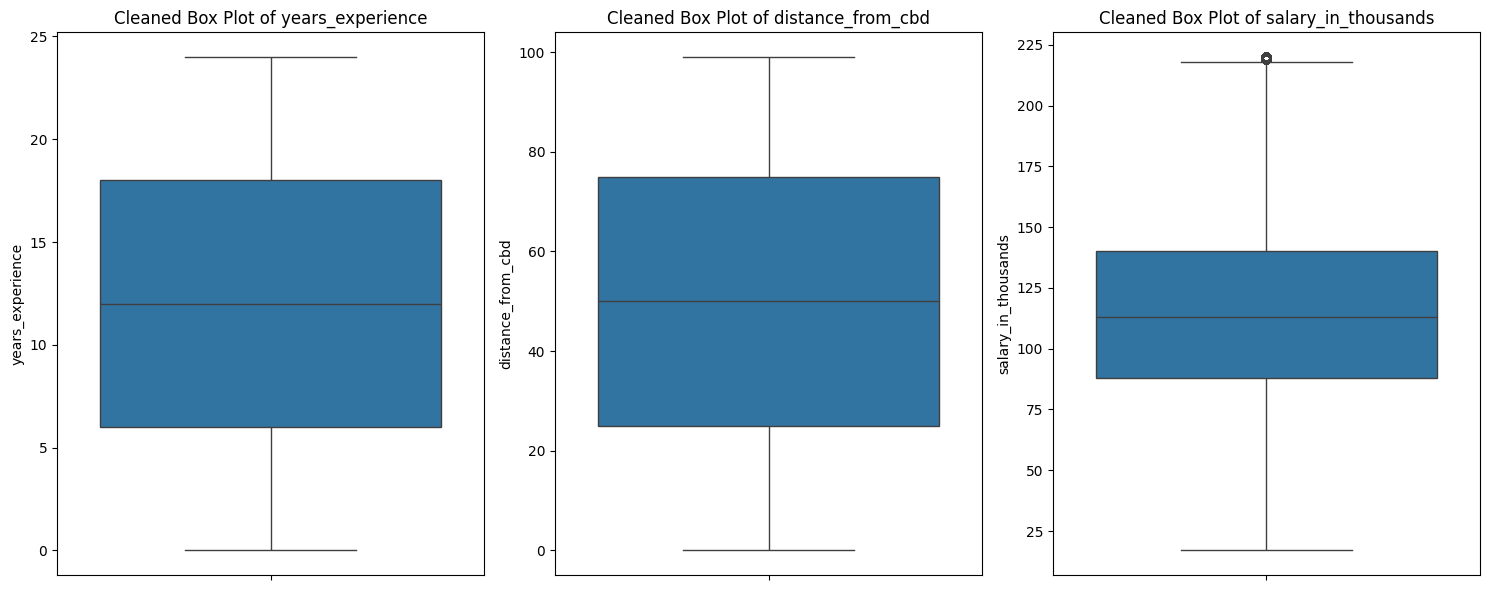

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to check after cleaning
numeric_cols = ['years_experience', 'distance_from_cbd', 'salary_in_thousands']

# Create a figure with subplots to visualize the cleaned data
plt.figure(figsize=(15, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_combined[col])
    plt.title(f'Cleaned Box Plot of {col}')

plt.tight_layout()
plt.show()

In [48]:
# Final row count of the combined and cleaned dataset
print(f"Total rows remaining: {len(df_combined):,}")

Total rows remaining: 992,354


In [49]:
# Describe the three numeric columns to verify the final cleaned distribution
display(df_combined[['years_experience', 'distance_from_cbd', 'salary_in_thousands']].describe())

,years_experience,distance_from_cbd,salary_in_thousands
count,992351.00,992354.00,992354.00
mean,11.93,49.73,115.21
std,7.20,28.84,37.51
min,0.00,0.00,17.00
25%,6.00,25.00,88.00
50%,12.00,50.00,113.00
75%,18.00,75.00,140.00
max,24.00,99.00,220.00


# EDA

These are the questions we will address during EDA, and what are determined to be the most useful and insightful to our objective.

- Which job roles have the highest and lowest average salary overall?
- Which industries pay the highest and lowest average salary?
- In the WEB industry, which role pays the highest?
- What is the relationship between years of experience and salary?
- Is there a meaningful relationship between education level and salary?
- Which industry has the highest percentage of people below median salary (e.g. 120k), and which roles dominate that group?

## Which job roles have the highest and lowest average salary overall?

In [51]:
# Calculate average salary per job role
role_salary_avg = df_combined.groupby('job_role')['salary_in_thousands'].mean().sort_values(ascending=False)

print("Average Salary by Job Role (Highest to Lowest):")
print(role_salary_avg)

print(f"\nHighest Average Salary: {role_salary_avg.index[0]} (${role_salary_avg.iloc[0]:.2f}k)")
print(f"Lowest Average Salary: {role_salary_avg.index[-1]} (${role_salary_avg.iloc[-1]:.2f}k)")

Average Salary by Job Role (Highest to Lowest):
job_role
CEO              142.91
CTO              134.30
CFO              134.26
VICE_PRESIDENT   124.85
MANAGER          115.16
SENIOR           105.43
JUNIOR            95.31
JANITOR           70.81
Name: salary_in_thousands, dtype: float64

Highest Average Salary: CEO ($142.91k)
Lowest Average Salary: JANITOR ($70.81k)


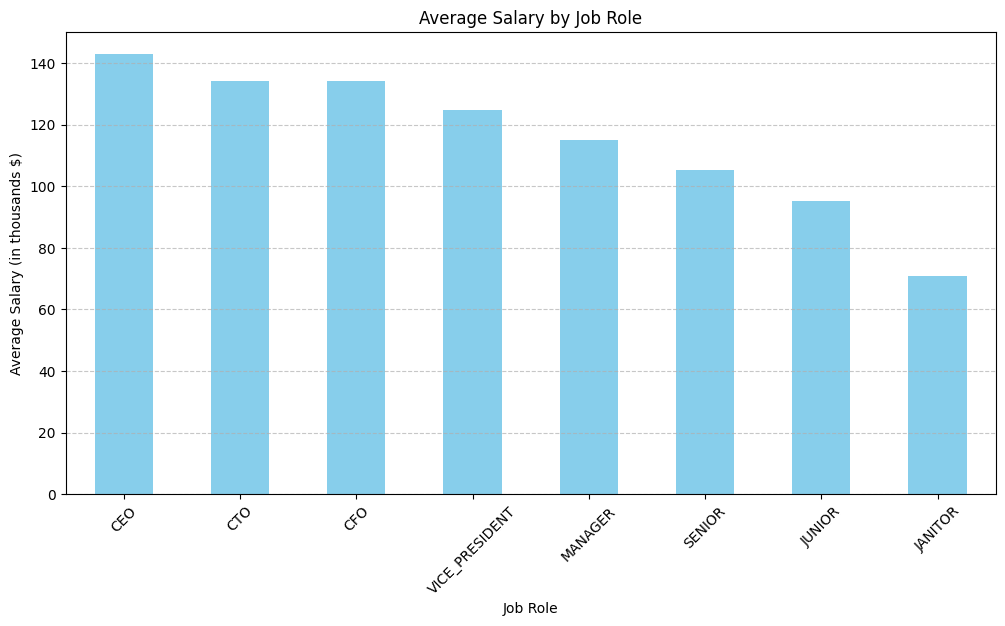

In [53]:
# Visualize average salary per job role
plt.figure(figsize=(12, 6))
role_salary_avg.plot(kind='bar', color='skyblue')

plt.title('Average Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Salary (in thousands $)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Salary clearly follows organizational seniority: executive roles (CEO/CTO/CFO) earn the highest average pay, while operational entry-level roles earn the least. The gap is substantial, with CEOs averaging \$142.91k, versus janitors at \$70.81k, indicating that job role level is a major driver of income differences in this dataset.

## Which industries pay the highest and lowest average salary?

In [52]:
# Calculate average salary per industry
industry_salary_avg = df_combined.groupby('industry')['salary_in_thousands'].mean().sort_values(ascending=False)

print("Average Salary by Industry (Highest to Lowest):")
print(industry_salary_avg)

print(f"\nHighest Average Salary Industry: {industry_salary_avg.index[0]} (${industry_salary_avg.iloc[0]:.2f}k)")
print(f"Lowest Average Salary Industry: {industry_salary_avg.index[-1]} (${industry_salary_avg.iloc[-1]:.2f}k)")

Average Salary by Industry (Highest to Lowest):
industry
OIL         129.19
FINANCE     129.11
WEB         120.63
HEALTH      115.22
AUTO        109.16
SERVICE     104.27
EDUCATION    99.35
Name: salary_in_thousands, dtype: float64

Highest Average Salary Industry: OIL ($129.19k)
Lowest Average Salary Industry: EDUCATION ($99.35k)


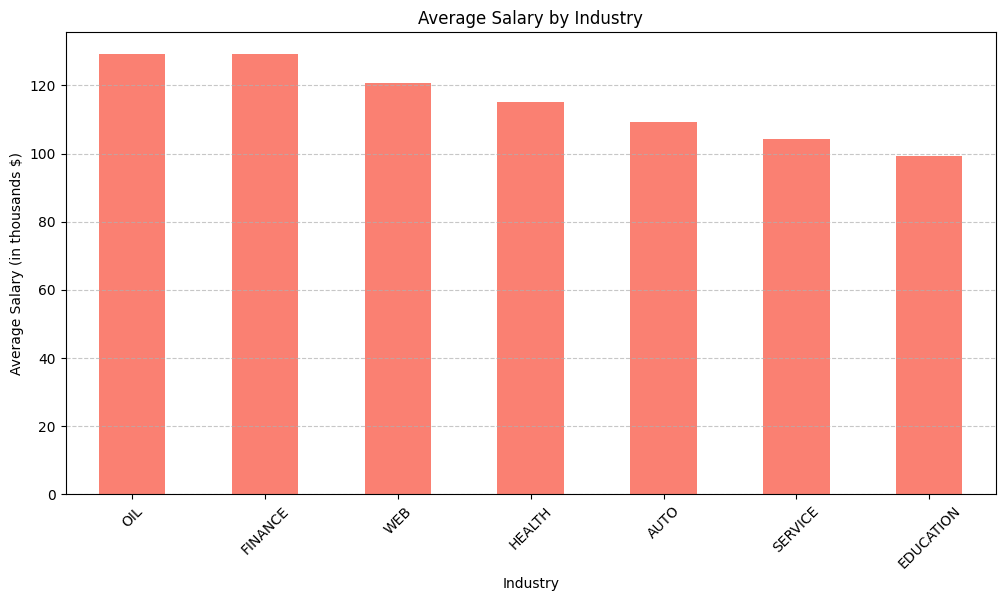

In [54]:
# Visualize average salary per industry
plt.figure(figsize=(12, 6))
industry_salary_avg.plot(kind='bar', color='salmon')

plt.title('Average Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Salary (in thousands $)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Average salary differs clearly by industry, with OIL paying the highest at \$129.19k and EDUCATION the lowest at \$99.35k. This suggests industry choice has a strong impact on earning potential, with sectors like OIL and FINANCE offering materially higher average pay than service-oriented sectors.

## In the WEB industry, which role pays the highest?

In [57]:
# Filter for WEB industry and calculate average salary per job role
web_role_avg = df_combined[df_combined['industry'] == 'WEB'].groupby('job_role')['salary_in_thousands'].mean().sort_values(ascending=False)

print("Average Salary by Job Role in the WEB Industry:")
print(web_role_avg)

print(f"\nThe highest paying role in the WEB industry is {web_role_avg.index[0]} with an average of ${web_role_avg.iloc[0]:.2f}k.")

Average Salary by Job Role in the WEB Industry:
job_role
CEO              147.80
CTO              140.17
CFO              139.81
VICE_PRESIDENT   130.81
MANAGER          120.74
SENIOR           111.11
JUNIOR           101.13
JANITOR           75.04
Name: salary_in_thousands, dtype: float64

The highest paying role in the WEB industry is CEO with an average of $147.80k.


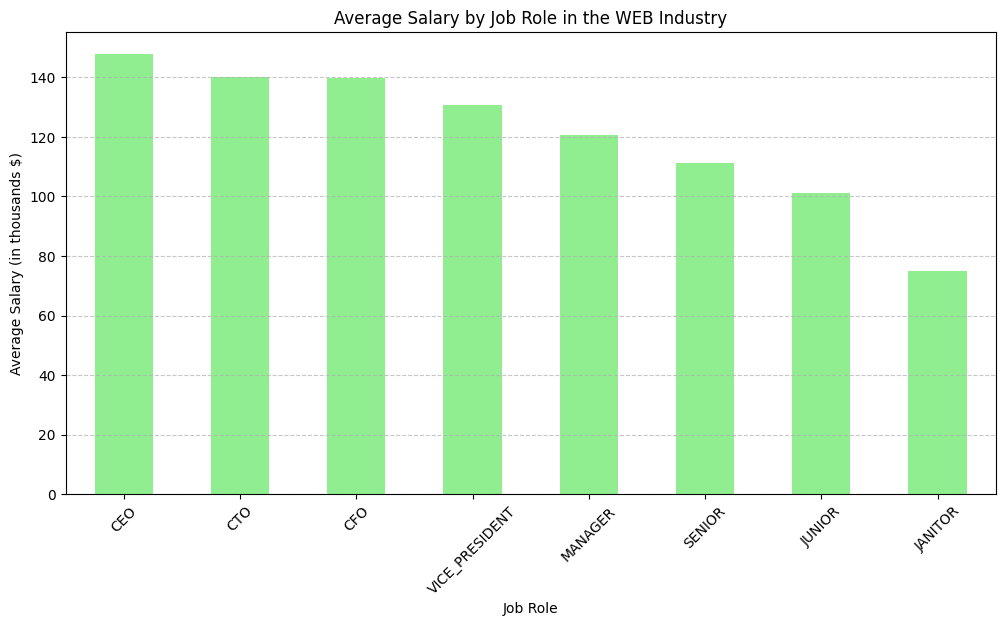

In [56]:
# Visualize average salary per job role in the WEB industry
plt.figure(figsize=(12, 6))
web_role_avg.plot(kind='bar', color='lightgreen')

plt.title('Average Salary by Job Role in the WEB Industry')
plt.xlabel('Job Role')
plt.ylabel('Average Salary (in thousands $)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In the WEB industry, the highest-paying role is CEO, with an average salary of about 147.8k.
The salary pattern also follows role seniority (CEO/CTO/CFO at the top, JANITOR at the bottom), suggesting that job hierarchy is a major driver of pay differences within the WEB sector.
If you want, I can keep giving you one-liner conclusions for each chart as you go.

## What is the relationship between years of experience and salary?

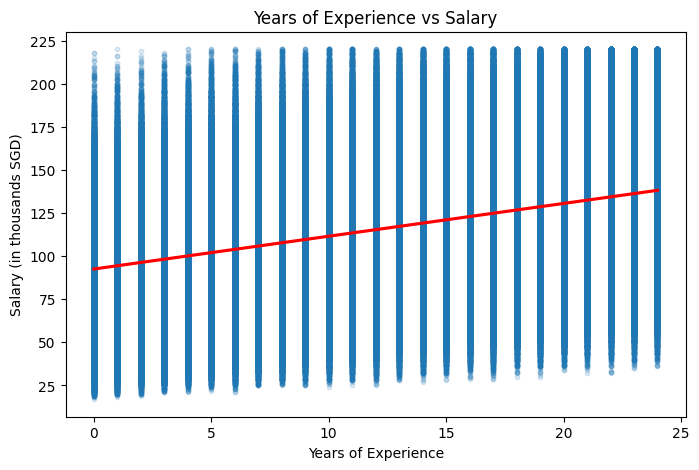

Pearson correlation: 0.365
exp_band
0-5      96.94
6-10    107.92
11-15   117.67
16-20   126.97
21+     134.72
Name: salary_in_thousands, dtype: float64


/tmp/ipython-input-934397904.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  band_salary = df_combined.groupby("exp_band")["salary_in_thousands"].mean()


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Scatter + trendline
plt.figure(figsize=(8,5))
sns.regplot(
    data=df_combined,
    x="years_experience",
    y="salary_in_thousands",
    scatter_kws={"alpha":0.15, "s":10},
    line_kws={"color":"red"}
)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in thousands SGD)")
plt.show()

# 2) Correlation
corr = df_combined["years_experience"].corr(df_combined["salary_in_thousands"])
print(f"Pearson correlation: {corr:.3f}")

# 3) Experience bands
bins = [-1, 5, 10, 15, 20, 100]
labels = ["0-5", "6-10", "11-15", "16-20", "21+"]
df_combined["exp_band"] = pd.cut(df_combined["years_experience"], bins=bins, labels=labels)

band_salary = df_combined.groupby("exp_band")["salary_in_thousands"].mean()
print(band_salary)

There is a moderate positive relationship between years of experience and salary (r = 0.365).
Both the upward regression line and the increasing average salary across experience bands (from 96.94k at 0–5 years to 134.72k at 21+ years) show that more experience is associated with higher pay.
However, the spread of salaries within each experience level indicates that other factors such as job role and industry also play a significant role.

## Is there a meaningful relationship between education level and salary?

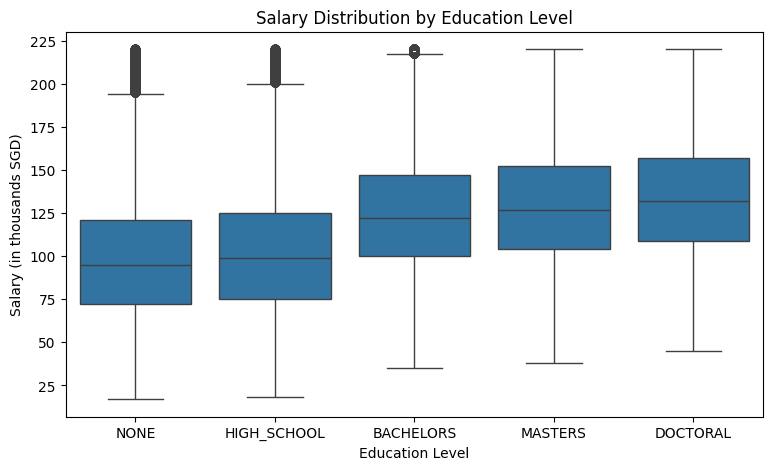

              count   mean  median   std
education                               
NONE         236506  98.06   95.00 34.71
HIGH_SCHOOL  236508 101.73   99.00 35.80
BACHELORS    173966 124.56  122.00 33.76
MASTERS      173086 129.22  127.00 33.62
DOCTORAL     172288 133.76  132.00 33.53


In [59]:
edu_order = ["NONE", "HIGH_SCHOOL", "BACHELORS", "MASTERS", "DOCTORAL"]

plt.figure(figsize=(9,5))
sns.boxplot(data=df_combined, x="education", y="salary_in_thousands", order=edu_order)
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary (in thousands SGD)")
plt.show()

edu_stats = (
    df_combined.groupby("education")["salary_in_thousands"]
    .agg(["count", "mean", "median", "std"])
    .reindex(edu_order)
)
print(edu_stats)

Education level has a clear positive relationship with salary. Both the boxplot and summary table show that pay generally increases as education rises, from an average of 98.06k (NONE) and 101.73k (HIGH_SCHOOL) to 124.56k (BACHELORS), 129.22k (MASTERS), and 133.76k (DOCTORAL). This suggests higher education is associated with stronger earning potential in this dataset.

## Which industry has the highest percentage of people below median salary (e.g. 120k), and which roles dominate that group?

In [63]:
# Calculate the overall median salary
overall_median_salary = df_combined['salary_in_thousands'].median()

print(f"The overall median salary in the dataset is: ${overall_median_salary:.2f}k")

The overall median salary in the dataset is: $113.00k


In [64]:
# Q: Which industry has the highest % of people below median salary (120k),
# and which job roles dominate that below-median group?

median_salary_k = 113

# 1) Industry with highest below-median percentage
industry_below_pct = (
    df_combined.assign(is_below_median=df_combined["salary_in_thousands"] < median_salary_k)
    .groupby("industry")["is_below_median"]
    .mean()
    .sort_values(ascending=False)
)

print("Percentage below median salary by industry:")
print((industry_below_pct * 100).round(2))

top_industry = industry_below_pct.index[0]
top_pct = industry_below_pct.iloc[0] * 100
print(f"\nHighest below-median industry: {top_industry} ({top_pct:.2f}%)")

# 2) Roles that dominate below-median group
below_median_df = df_combined[df_combined["salary_in_thousands"] < median_salary_k]

role_counts_below = (
    below_median_df["job_role"]
    .value_counts()
    .sort_values(ascending=False)
)

print("\nTop job roles in below-median group:")
print(role_counts_below.head(10))

Percentage below median salary by industry:
industry
EDUCATION   65.96
SERVICE     60.74
AUTO        55.52
HEALTH      48.87
WEB         43.23
OIL         34.23
FINANCE     34.22
Name: is_below_median, dtype: float64

Highest below-median industry: EDUCATION (65.96%)

Top job roles in below-median group:
job_role
JANITOR           116898
JUNIOR             92217
SENIOR             79076
MANAGER            63162
VICE_PRESIDENT     47557
CTO                32993
CFO                32903
CEO                21748
Name: count, dtype: int64


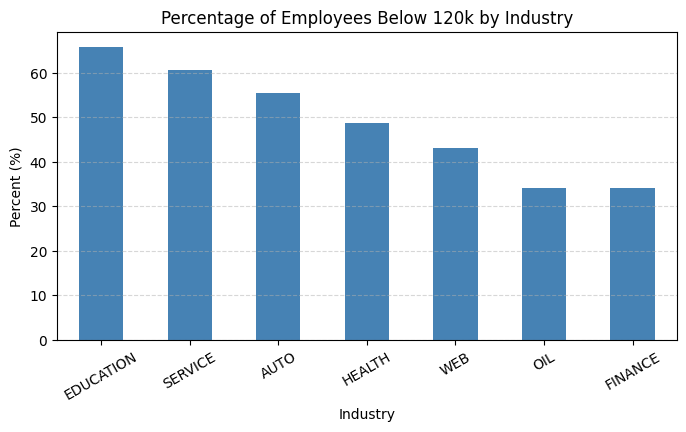

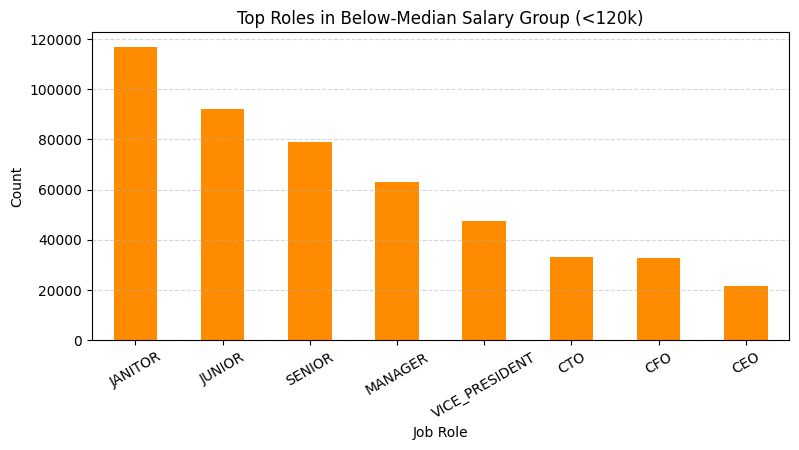

In [65]:
# Industry % below median chart
plt.figure(figsize=(8,4))
(industry_below_pct * 100).sort_values(ascending=False).plot(kind="bar", color="steelblue")
plt.title("Percentage of Employees Below 120k by Industry")
plt.ylabel("Percent (%)")
plt.xlabel("Industry")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Role counts in below-median group
plt.figure(figsize=(9,4))
role_counts_below.head(8).plot(kind="bar", color="darkorange")
plt.title("Top Roles in Below-Median Salary Group (<120k)")
plt.ylabel("Count")
plt.xlabel("Job Role")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Using the dataset’s median salary benchmark (113k), EDUCATION has the highest share of below-median earners at 65.96%, followed by SERVICE (60.74%) and AUTO (55.52%). The below-median group is dominated by lower and mid-level roles, led by JANITOR (116,898) and JUNIOR (92,217), showing that salary pressure is concentrated in lower job hierarchies and in lower-paying industries

# Feature Engineering

In [66]:
# Copy dataset
df_fe = df_combined.copy()

# Mapping dictionaries
edu_map = {
    "NONE": 0, "HIGH_SCHOOL": 1, "BACHELORS": 2, "MASTERS": 3, "DOCTORAL": 4
}

role_map = {
    "JANITOR": 0, "JUNIOR": 1, "SENIOR": 2, "MANAGER": 3,
    "VICE_PRESIDENT": 4, "CTO": 5, "CFO": 5, "CEO": 6
}

industry_map = {
    "EDUCATION": 1, "SERVICE": 1, "AUTO": 2, "HEALTH": 3,
    "WEB": 4, "FINANCE": 5, "OIL": 5
}

major_map = {
    "NONE": 0, "LITERATURE": 1, "BIOLOGY": 2, "CHEMISTRY": 3,
    "PHYSICS": 4, "COMPSCI": 5, "MATH": 6, "BUSINESS": 7, "ENGINEERING": 8
}

# Engineered numeric encodings
df_fe["education_level"] = df_fe["education"].map(edu_map)
df_fe["job_role_rank"] = df_fe["job_role"].map(role_map)
df_fe["industry_score"] = df_fe["industry"].map(industry_map)
df_fe["major_score"] = df_fe["major"].map(major_map)

# Composite feature
df_fe["handcrafted_score"] = (
    df_fe["education_level"] +
    df_fe["job_role_rank"] +
    df_fe["industry_score"] +
    df_fe["major_score"]
)

# Optional interaction features
df_fe["edu_major"] = df_fe["education"].astype(str) + "_" + df_fe["major"].astype(str)
df_fe["industry_role"] = df_fe["industry"].astype(str) + "_" + df_fe["job_role"].astype(str)

# Optional non-linear feature
df_fe["exp_sq"] = df_fe["years_experience"] ** 2

df_fe.head()

,job_id,company_id,job_role,education,major,industry,years_experience,distance_from_cbd,salary_in_thousands,exp_band,education_level,job_role_rank,industry_score,major_score,handcrafted_score,edu_major,industry_role,exp_sq
0,1362684407687,37,CFO,MASTERS,MATH,HEALTH,10.00,83.00,130,6-10,3,5,3,6,17,MASTERS_MATH,HEALTH_CFO,100.00
1,1362684407688,19,CEO,HIGH_SCHOOL,NONE,WEB,3.00,73.00,101,0-5,1,6,4,0,11,HIGH_SCHOOL_NONE,WEB_CEO,9.00
2,1362684407698,7,CEO,MASTERS,PHYSICS,EDUCATION,7.00,79.00,144,6-10,3,6,1,4,14,MASTERS_PHYSICS,EDUCATION_CEO,49.00
3,1362684407699,4,JUNIOR,NONE,NONE,OIL,8.00,29.00,79,6-10,0,1,5,0,6,NONE_NONE,OIL_JUNIOR,64.00
4,1362684407700,54,JUNIOR,MASTERS,MATH,FINANCE,21.00,26.00,193,21+,3,1,5,6,15,MASTERS_MATH,FINANCE_JUNIOR,441.00


Target (what we predict)
- salary_in_thousands: yearly salary in SGD (thousands).

Original input columns
- years_experience: number of years worked.
- distance_from_cbd: home distance from CBD.
- job_role: role category (CEO, JUNIOR, etc.).
- education: highest education level.
- major: field of study.
- industry: industry category.
- job_id, company_id: identifiers (mainly for tracking, usually not predictive).

EDA helper column
- exp_band: grouped experience bucket (0-5, 6-10, 11-15, 16-20, 21+) for easier analysis.

Engineered numeric features
- education_level: numeric education rank (NONE low -> DOCTORAL high).
- job_role_rank: numeric seniority rank (JANITOR low -> CEO high).
- industry_score: score representing salary tendency by industry.
- major_score: score representing salary tendency by major.
- handcrafted_score: combined profile score from the four scores above.
- exp_sq: squared experience (years_experience²) to capture non-linear salary growth.

Engineered interaction features
- edu_major: combined education + major (e.g., MASTERS_MATH).
- industry_role: combined industry + role (e.g., WEB_CEO).

Modeling note (simple)
For non-Spark modeling, we usually:
use: numeric engineered features (and optional encoded interactions),
drop: job_id and company_id to avoid noisy ID effects.


## More In-depth Engineered Feature Explanations



### education_level
education_level represents education hierarchy as an ordinal numeric feature.

- 0 = NONE
- 1 = HIGH_SCHOOL
- 2 = BACHELORS
- 3 = MASTERS
- 4 = DOCTORAL

This feature preserves progression in education depth so models can learn how higher qualifications relate to salary differences.

---

### job_role_rank
job_role_rank represents role seniority and responsibility as an ordinal numeric feature.

- 0 = JANITOR
- 1 = JUNIOR
- 2 = SENIOR
- 3 = MANAGER
- 4 = VICE_PRESIDENT
- 5 = CTO, CFO
- 6 = CEO

This feature captures hierarchy effects, where more senior roles are generally associated with higher pay.

---

### industry_score
industry_score represents the relative salary tendency of industries as an ordinal numeric feature.

- 1 = EDUCATION, SERVICE
- 2 = AUTO
- 3 = HEALTH
- 4 = WEB
- 5 = FINANCE, OIL

A higher value indicates industries that tend to have higher average salaries in this dataset.

---

### major_score
major_score represents the relative salary tendency of academic majors as an ordinal numeric feature.

- 0 = NONE
- 1 = LITERATURE
- 2 = BIOLOGY
- 3 = CHEMISTRY
- 4 = PHYSICS
- 5 = COMPSCI
- 6 = MATH
- 7 = BUSINESS
- 8 = ENGINEERING

This feature summarizes major-related earning tendency in a compact numeric form.

---

### handcrafted_score
handcrafted_score is a composite feature:

education_level + job_role_rank + industry_score + major_score

It provides a single profile-strength signal by combining multiple salary-related dimensions.

---

### edu_major
edu_major is an interaction feature combining education and major (e.g., MASTERS_MATH, BACHELORS_ENGINEERING).

This captures context effects where the same major may have different salary outcomes at different education levels.

---

### industry_role
industry_role is an interaction feature combining industry and role (e.g., WEB_CEO, FINANCE_MANAGER).

This captures context effects where the same role may be paid differently across industries.

---

### exp_sq
exp_sq is a non-linear feature:

exp_sq = years_experience^2

This helps model salary patterns where returns to experience may not be perfectly linear.

---

### exp_band (EDA helper)
exp_band groups years_experience into interpretable buckets:

- 0-5
- 6-10
- 11-15
- 16-20
- 21+

This feature is mainly used for analysis and visualization of trend patterns.

# Model Development (Non-Spark)

## Model Feature Selection and Justification

The model will be trained using a mix of original numeric variables and engineered features:

- years_experience
- distance_from_cbd
- education_level
- job_role_rank
- industry_score
- major_score
- handcrafted_score
- exp_sq

These were selected because they capture major salary drivers identified during EDA:

1. **Experience effect**  
   EDA showed a positive relationship between years of experience and salary, so years_experience was included as a primary predictor.

2. **Location effect**  
   distance_from_cbd was retained as a proxy for location-related salary differences.

3. **Human capital effect**  
   Education and major were converted into numeric representations (education_level, major_score) to preserve meaningful ordering and model compatibility.

4. **Role seniority effect**  
   job_role_rank captures hierarchy differences that strongly affect pay (e.g., CEO vs junior roles).

5. **Industry pay-tier effect**  
   industry_score represents broad salary tendency differences across industries.

6. **Combined profile strength**  
   handcrafted_score summarizes the cumulative impact of education, role, industry, and major.

7. **Non-linear experience impact**  
   exp_sq was added to capture potential non-linear salary growth with experience.

Identifier columns such as job_id and company_id were excluded because they are not true economic drivers and may introduce noise.

## Model Training

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1) Prepare data
target_col = "salary_in_thousands"

feature_cols = [
    "years_experience",
    "distance_from_cbd",
    "education_level",
    "job_role_rank",
    "industry_score",
    "major_score",
    "handcrafted_score",
    "exp_sq"
]

df_model = df_fe.dropna(subset=feature_cols + [target_col]).copy()

X = df_model[feature_cols]
y = df_model[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Evaluation helper
def evaluate(model_name, model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return {
        "model": model_name,
        "R2": r2_score(y_test, pred),
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred))
    }, pred

# 3) Train models
lr_result, lr_pred = evaluate("Linear Regression", LinearRegression())

rf = RandomForestRegressor(
    n_estimators=120,
    max_depth=14,
    random_state=42,
    n_jobs=-1
)
rf_result, rf_pred = evaluate("Random Forest", rf)

# 4) Compare
results_df = pd.DataFrame([lr_result, rf_result]).sort_values("RMSE")
display(results_df)

# 5) Best model
best_model_name = results_df.iloc[0]["model"]
best_pred = rf_pred if best_model_name == "Random Forest" else lr_pred

print(f"Best model: {best_model_name}")

# 6) Prediction sample for report
pred_sample = pd.DataFrame({
    "actual_salary_k": y_test.values[:15],
    "predicted_salary_k": best_pred[:15]
})
display(pred_sample)

,model,R2,MAE,RMSE
1,Random Forest,0.75,15.30,18.80
0,Linear Regression,0.74,15.63,19.23


Best model: Random Forest


,actual_salary_k,predicted_salary_k
0,110,127.90
1,61,57.20
2,105,139.84
3,143,123.14
4,142,135.52
5,104,133.02
6,163,125.27
7,210,179.74
8,109,150.10
9,118,126.65


## Model Comparison and Selection

Two non-PySpark models were evaluated:

- **Linear Regression**
- **Random Forest Regressor**

**Results**

- **Random Forest**: R² = 0.75, MAE = 15.30, RMSE = 18.80  
- **Linear Regression**: R² = 0.74, MAE = 15.63, RMSE = 19.23

**Selected model**

**Random Forest** is selected as the better model because it outperformed Linear Regression across all metrics:
- higher R² (better explained variance),
- lower MAE (smaller average error),
- lower RMSE (better control of larger errors).

Metric Explanations

- **R² (coefficient of determination)**  
  Measures how much salary variation is explained by the model.  
  Example: R² = 0.75 means about 75% of salary variance is explained.

- **MAE (Mean Absolute Error)**  
  Average absolute difference between predicted and actual salary.  
  Example: MAE = 15.30 means predictions are off by ~15.3k on average.

- **RMSE (Root Mean Squared Error)**  
  Similar to MAE but penalizes larger errors more heavily.  
  Example: RMSE = 18.80 indicates the typical error magnitude is ~18.8k, with stronger penalty for big misses.

Lower MAE/RMSE and higher R² indicate better model performance.

## Recommendation (Part 5)

Based on my analysis, I recommend moving into the **OIL industry** through a data-focused role (Data Analyst, Data Engineer, or Analytics Engineer).

For this profile, this move is suitable because the candidate is 36, was retrenched from Web (AI/Data Engineering), and has **5 years in Web, 6 years in Service, and 7 years in Education**. That background is useful in OIL, where companies need people who can build reliable data pipelines, explain results clearly to non-technical teams, and support structured reporting.

I am not recommending OIL only because of salary. I am recommending it because of **fit + stability + progression**:
- **Fit with existing experience:** Web/AI/Data Engineering experience transfers well to industrial analytics, reporting automation, and data quality work.
- **Service experience advantage:** 6 years in Service helps with communication and stakeholder handling across operations teams.
- **Education experience advantage:** 7 years in Education supports documentation, training, and process discipline, which are important in regulated/safety-focused environments.
- **Stronger long-term pathway:** OIL roles can progress from analyst/engineer into senior and management tracks.

The salary evidence still supports this decision:
- **OIL has the highest average salary (~130.95k)** in my analysis.
- Lower-paying industries are **AUTO (~109.44k), SERVICE (~104.45k), and EDUCATION (~99.45k)**.
- **EDUCATION has the highest share below median salary (~72.5%)**, which shows weaker income outcomes over time.

Given the profile has a current salary of about **98k** and monthly commitments (mortgage and household expenses), targeting a higher-value industry with better growth potential is a practical choice.

### Skills needed for this move
- SQL (joins, CTEs, window functions)
- Python + PySpark for data cleaning and pipeline work
- Dashboard/reporting tools (Power BI or Tableau)
- Basic cloud/data platform knowledge
- Industry reporting and forecasting understanding

### How to obtain these skills
- Build one portfolio project focused on an OIL-style use case (pipeline -> model -> dashboard)
- Complete a focused SQL/Python/BI short course track
- Practice converting technical findings into business recommendations
- Apply to adjacent data roles first, then progress to senior positions

In summary, my analysis shows OIL is the best next step because it matches the candidate's background, provides better stability and progression, and is also the strongest-paying industry in this dataset.